In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.append('..//Lagrange-a-Hamilton')

# Generación de los símbolos

Se generan la totalidad de simbolos a utilizar para el desarrollo del ejercicio

In [2]:
m1,m2,m3, G ,M,Ll= smp.symbols(r"m1,m2,m3, G,M,L", positive = True, real = True)

from sympy.physics.mechanics import dynamicsymbols , init_vprinting # Se utilizan estas funciones para tener notacion de Newton para las derivadas temporales y se generan 
                                                                    # las funciones con dependencia implicita a t

init_vprinting()

t = smp.Symbol("t", positive = True) # Tiempo
x1,y1,z1 , x2,y2,z2 , x3,y3,z3 = dynamicsymbols(r"x_1,y_1,z_1 , x_2,y_2,z_2 , x_3,y_3,z_3", real = True) 

dx2 = smp.diff(x2)
dy2 = smp.diff(y2)
dz2 = smp.diff(z2)

dx3 = smp.diff(x3)
dy3 = smp.diff(y3)
dz3 = smp.diff(z3)

# Cantidades Físicas

Vectores de posición y velocidad, junto a la energía cinética y potencial del sistema.

También se conforma el Lagrangiano

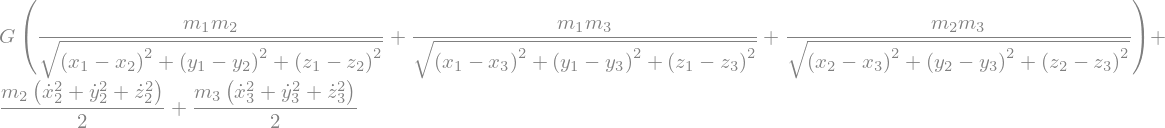

In [3]:
r1 = smp.Matrix([x1,y1,z1])
r2 = smp.Matrix([x2,y2,z2])
r3 = smp.Matrix([x3,y3,z3])

v2 = smp.diff(r2)
v3 = smp.diff(r3)

vv2 = v2.dot(v2)
vv3 = v3.dot(v3)

T = smp.Rational(1,2)*m2*vv2 + smp.Rational(1,2)*m3*vv3
V = -G*(m1*m2/((r1-r2).norm())+m1*m3/(r1-r3).norm() +m3*m2/(r3-r2).norm())

L = T - V
L

Obteniendo el Hamiltoneano del sistema

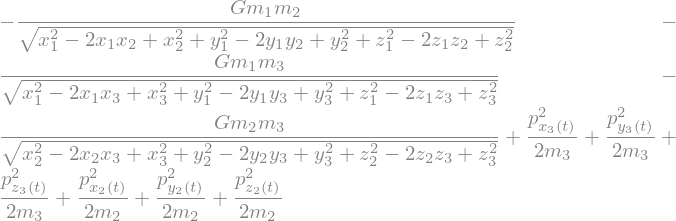

In [4]:
from lagrange_a_hamilton import cambio_L_H
coordenadas_generalizadas = [x2,y2,z2 , x3,y3,z3]

H, s_momentos_generalizados, momentos_generalizados = cambio_L_H(L,coordenadas_generalizadas)
H

$$ \dot{q} = \frac{\partial H}{\partial p} \\



\dot{p} = - \frac{\partial H}{\partial q}

In [10]:
ecuaciones_dq = []
for i in range(len(coordenadas_generalizadas)):
    aux = smp.diff(H,s_momentos_generalizados[i])
    ecuaciones_dq.append(aux)

qs = [x2,y2,z2 , x3,y3,z3]

ecuaciones_dp = []
for i in range(len(s_momentos_generalizados)):
    aux = -smp.diff(H, qs[i])
    ecuaciones_dp.append(aux)

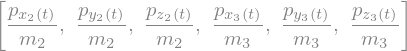

In [11]:
ecuaciones_dq

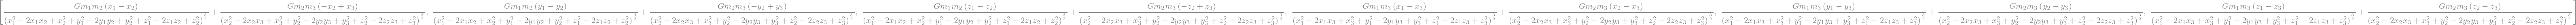

In [12]:
ecuaciones_dp

In [13]:
s_momentos_generalizados

In [ ]:
px2 = s_momentos_generalizados[0]
py2 = s_momentos_generalizados[1]
pz2 = s_momentos_generalizados[2]

px3 = s_momentos_generalizados[3]
py3 = s_momentos_generalizados[4]
pz3 = s_momentos_generalizados[5]

# Masa , longitudes y tiempos caracteristicos

Se va a definir ciertas masas, longitudes y tiempos caracteriscos para facilitar la implementacion en python.

$\bullet$ **Masa caracteristica:** Masa del Sol ($M_{sol} = 1,989 \times 10^{30} kg$)  $\Rightarrow$ $m'_{i} = \frac{m_{i} }{M}$ 

$\bullet$ **Longitud caracteristica :** Longitud promedio entre la Tierra y el Sol ($1 UA = 149. 597 .870 .700 m$) $\Rightarrow$ $\vec{r'}_{i} =\frac{\vec{r}}{L}$

$\bullet$ **Tiempo caracteristica :** $T = \left(\sqrt{\frac{GM_c}{L_c^3}}\right)^{-1}$ $\Rightarrow$ $t' = \frac{t}{T}$

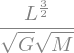

In [10]:
Tn = (smp.sqrt(G*M/Ll**3))**(-1)
Tn

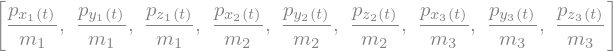

In [11]:
ecuaciones_dq_normalizadas = []

for i in range(len(ecuaciones_dq)):
	aux = ecuaciones_dq[i].subs([(m1,m1*M),(m2,m2*M),(m3,m3*M),(px1,px1*M*Ll/Tn),(py1,py1*M*Ll/Tn),(pz1,pz1*M*Ll/Tn),(px2,px2*M*Ll/Tn),(py2,py2*M*Ll/Tn),
								(pz2,pz2*M*Ll/Tn),(px3,px3*M*Ll/Tn),(py3,py3*M*Ll/Tn),(pz3,pz3*M*Ll/Tn)])*Tn/Ll
	aux1 = aux
	ecuaciones_dq_normalizadas.append(aux1)

ecuaciones_dq_normalizadas

0
1
2
3
4
5
6
7
8


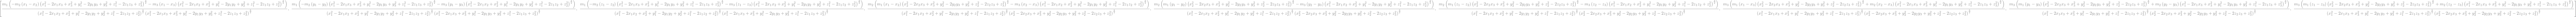

In [12]:
ecuaciones_dp_normalizadas = []

for i in range(len(ecuaciones_dp)):
    aux = ecuaciones_dp[i].subs([(m1,m1*M),(m2,m2*M),(m3,m3*M),(x1,x1*Ll), (y1,y1*Ll),(z1,z1*Ll),(x2,x2*Ll), (y2,y2*Ll),(z2,z2*Ll),(x3,x3*Ll), (y3,y3*Ll),(z3,z3*Ll)])*Tn**2 /(M*Ll)
    aux1 = aux.simplify()
    print(i)
    ecuaciones_dp_normalizadas.append(aux1)

ecuaciones_dp_normalizadas

Convirtiendo las expresiones anteriores a expresiones numericas

In [13]:
########################
dq1x_n = smp.lambdify([m1,px1],ecuaciones_dq_normalizadas[0])
dq1y_n = smp.lambdify([m1,py1],ecuaciones_dq_normalizadas[1])
dq1z_n = smp.lambdify([m1,pz1],ecuaciones_dq_normalizadas[2])

dp1x_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[0])
dp1y_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[1])
dp1z_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[2])

########################
dq2x_n = smp.lambdify([m2,px2],ecuaciones_dq_normalizadas[3])
dq2y_n = smp.lambdify([m2,py2],ecuaciones_dq_normalizadas[4])
dq2z_n = smp.lambdify([m2,pz2],ecuaciones_dq_normalizadas[5])

dp2x_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[3])
dp2y_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[4])
dp2z_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[5])

#########################
dq3x_n = smp.lambdify([m3,px3],ecuaciones_dq_normalizadas[6])
dq3y_n = smp.lambdify([m3,py3],ecuaciones_dq_normalizadas[7])
dq3z_n = smp.lambdify([m3,pz3],ecuaciones_dq_normalizadas[8])

dp3x_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[6])
dp3y_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[7])
dp3z_n = smp.lambdify([m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp_normalizadas[8])

Funcion auxiliar para la integración numérica

In [14]:
def dSdt(t, S, m1, m2, m3):
    # Desempaquetar las variables de estado
    [q1x, q1y, q1z, p1x, p1y, p1z, 
    q2x, q2y, q2z, p2x, p2y, p2z, 
    q3x, q3y, q3z, p3x, p3y, p3z] = S

    # Calcular las derivadas para el cuerpo 1
    dq1x = dq1x_n(m1, p1x)
    dq1y = dq1y_n(m1, p1y)
    dq1z = dq1z_n(m1, p1z)
    dp1x = dp1x_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp1y = dp1y_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp1z = dp1z_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Calcular las derivadas para el cuerpo 2
    dq2x = dq2x_n(m2, p2x)
    dq2y = dq2y_n(m2, p2y)
    dq2z = dq2z_n(m2, p2z)
    dp2x = dp2x_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp2y = dp2y_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp2z = dp2z_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Calcular las derivadas para el cuerpo 3
    dq3x = dq3x_n(m3, p3x)
    dq3y = dq3y_n(m3, p3y)
    dq3z = dq3z_n(m3, p3z)
    dp3x = dp3x_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp3y = dp3y_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp3z = dp3z_n(m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Retornar la lista de derivadas
    return [dq1x, dq1y, dq1z, dp1x, dp1y, dp1z, 
            dq2x, dq2y, dq2z, dp2x, dp2y, dp2z, 
            dq3x, dq3y, dq3z, dp3x, dp3y, dp3z]

# Sistema de estudio

In [15]:
# Masas
Masa_sol = 1.989 * 10**30 # Esta es la masa caracteristica
#Masa_Tierra = 5.972 * 10**24
#Masa_Luna = 7.349 * 10**22

# Longitud caracteristica
UA = 149597870700

T_n = Tn.subs([(Ll,UA),(M,Masa_sol),(G,6.672 *10**(-11))]).evalf()


#vel_Tierra_afelio = 29.29 *(1000/(UA/T_n)) 
#vel_luna = 1*(1000/(UA/T_n))

In [ ]:
t0 = 0
tf = 3600*24*365/T_n
n=round((tf-t0)/(3600*24/T_n))

t_n = np.linspace(t0,int(tf),n)


# Argumentos


m1_n = 1
m2_n = 1
m3_n = 1

argumentos = [m1_n,m2_n,m3_n]

# Condiciones iniciales


q1x0 = 1
q1y0 = 0
q1z0 = 1

p1x0 = 0
p1y0 = 0
p1z0 = -1

#######################

q2x0 = 1
q2y0 = 1
q2z0 = 0

p2x0 = 0
p2y0 = 0
p2z0 = 1

#######################

q3x0 = 0
q3y0 = 1
q3z0 = 1

p3x0 = 0
p3y0 = 0
p3z0 = -0.6

condiciones_iniciales = [q1x0,q1y0,q1z0,
                        p1x0,p1y0,p1z0, 
                        
						q2x0,q2y0,q2z0,
                        p2x0,p2y0,p2z0, 
                        
						q3x0,q3y0,q3z0,
                        p3x0,p3y0,p3z0]

In [17]:
from scipy.integrate  import solve_ivp


sol = solve_ivp(dSdt, t_span = (t0,tf), t_eval = t_n, y0 = condiciones_iniciales, args = argumentos)
pos = sol.y

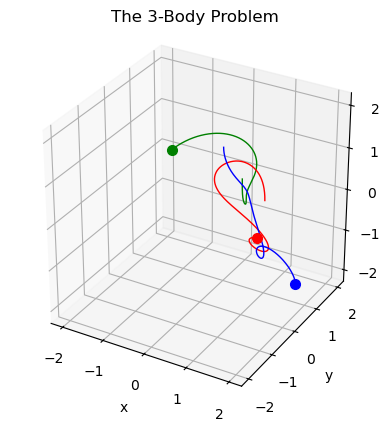

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Graficar trayectorias
planet1_plt, = ax.plot(pos[0], pos[1], pos[2], 'green', label='Sol', linewidth=1)
planet2_plt, = ax.plot(pos[6], pos[7], pos[8], 'red', label='Tierra', linewidth=1)
planet3_plt, = ax.plot(pos[12], pos[13], pos[14], 'blue', label='Luna', linewidth=1)

# Graficar puntos finales
planet1_dot, = ax.plot([pos[0][-1]], [pos[1][-1]], [pos[2][-1]], 'o', color='green', markersize=7)
planet2_dot, = ax.plot([pos[6][-1]], [pos[7][-1]], [pos[8][-1]], 'o', color='red', markersize=7)
planet3_dot, = ax.plot([pos[12][-1]], [pos[13][-1]], [pos[14][-1]], 'o', color='blue', markersize=7)

# Configurar títulos y etiquetas
ax.set_title("The 3-Body Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()
#plt.legend()

# Asegurar que el origen esté centrado y la escala sea fija
max_range = max(
    max(abs(pos[0])), max(abs(pos[1])), max(abs(pos[2])),
    max(abs(pos[6])), max(abs(pos[7])), max(abs(pos[8])),
    max(abs(pos[12])), max(abs(pos[13])), max(abs(pos[14]))
)

ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

# Hacer que la escala sea isótropa
ax.set_box_aspect([1, 1, 1])  # Relación de aspecto isótropa

# Guardar la figura
plt.savefig("3_cuerpos.png")

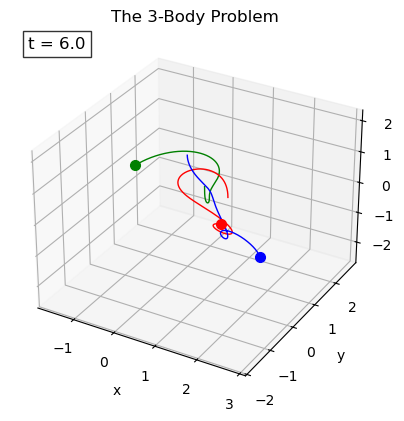

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Crear la figura y el eje 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Configurar las etiquetas
ax.set_title("The 3-Body Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Inicializar las trayectorias y puntos
planet1_plt, = ax.plot([], [], [], 'green', label='Sol', linewidth=1)
planet2_plt, = ax.plot([], [], [], 'red', label='Tierra', linewidth=1)
planet3_plt, = ax.plot([], [], [], 'blue', label='Luna', linewidth=1)

planet1_dot, = ax.plot([], [], [], 'o', color='green', markersize=7)
planet2_dot, = ax.plot([], [], [], 'o', color='red', markersize=7)
planet3_dot, = ax.plot([], [], [], 'o', color='blue', markersize=7)

# Agregar una caja de texto para mostrar el tiempo
time_text = ax.text2D(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Parámetros para ajustar los límites
window = 100  # Número de puntos recientes a considerar para los límites
smooth_factor = 0.2  # Factor de suavizado para límites dinámicos (0: inmóvil, 1: cambios inmediatos)

# Función para ajustar dinámicamente los límites del gráfico con suavizado
def adjust_limits(i):
    # Asegurar que el índice de la ventana no sea negativo
    start_idx = max(0, i - window)

    # Obtener los datos recientes según la ventana, asegurándose de no tener índices negativos
    x_all = np.concatenate([pos[0][start_idx:i], pos[6][start_idx:i], pos[12][start_idx:i]])
    y_all = np.concatenate([pos[1][start_idx:i], pos[7][start_idx:i], pos[13][start_idx:i]])
    z_all = np.concatenate([pos[2][start_idx:i], pos[8][start_idx:i], pos[14][start_idx:i]])

    # Si los arreglos están vacíos, retornar
    if x_all.size == 0 or y_all.size == 0 or z_all.size == 0:
        return

    # Calcular los nuevos límites con un margen adicional
    x_min, x_max = x_all.min(), x_all.max()
    y_min, y_max = y_all.min(), y_all.max()
    z_min, z_max = z_all.min(), z_all.max()
    
    # Calcular el rango máximo entre los tres ejes para hacer la escala simétrica
    max_range = max(x_max - x_min, y_max - y_min, z_max - z_min)
    margin = 0.1 * max_range  # Margen para asegurarse de que hay espacio alrededor de los puntos

    # Obtener los límites actuales
    current_xlim, current_ylim, current_zlim = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()

    # Establecer los nuevos límites de forma simétrica en torno al centro de los datos
    center_x = (x_max + x_min) / 2
    center_y = (y_max + y_min) / 2
    center_z = (z_max + z_min) / 2

    ax.set_xlim([center_x - max_range / 2 - margin, center_x + max_range / 2 + margin])
    ax.set_ylim([center_y - max_range / 2 - margin, center_y + max_range / 2 + margin])
    ax.set_zlim([center_z - max_range / 2 - margin, center_z + max_range / 2 + margin])

# Función de inicialización
def init():
    planet1_plt.set_data([], [])
    planet1_plt.set_3d_properties([])
    
    planet2_plt.set_data([], [])
    planet2_plt.set_3d_properties([])
    
    planet3_plt.set_data([], [])
    planet3_plt.set_3d_properties([])
    
    planet1_dot.set_data([], [])
    planet1_dot.set_3d_properties([])
    
    planet2_dot.set_data([], [])
    planet2_dot.set_3d_properties([])
    
    planet3_dot.set_data([], [])
    planet3_dot.set_3d_properties([])
    
    time_text.set_text('')  # Inicializar la caja de texto vacía
    
    return planet1_plt, planet2_plt, planet3_plt, planet1_dot, planet2_dot, planet3_dot, time_text

# Función de animación
def animate(i):
    # Ajustar dinámicamente los límites
    adjust_limits(i)
    
    # Actualizar trayectorias
    planet1_plt.set_data(pos[0][:i], pos[1][:i])
    planet1_plt.set_3d_properties(pos[2][:i])

    planet2_plt.set_data(pos[6][:i], pos[7][:i])
    planet2_plt.set_3d_properties(pos[8][:i])

    planet3_plt.set_data(pos[12][:i], pos[13][:i])
    planet3_plt.set_3d_properties(pos[14][:i])

    # Actualizar los puntos de posición actual
    planet1_dot.set_data([pos[0][i]], [pos[1][i]])
    planet1_dot.set_3d_properties([pos[2][i]])

    planet2_dot.set_data([pos[6][i]], [pos[7][i]])
    planet2_dot.set_3d_properties([pos[8][i]])

    planet3_dot.set_data([pos[12][i]], [pos[13][i]])
    planet3_dot.set_3d_properties([pos[14][i]])

    # Actualizar el texto con el tiempo correspondiente
    time_text.set_text(f't = {np.round(sol.t[i], 2)}')  # Aquí puedes ajustar la escala de tiempo si es necesario

    return planet1_plt, planet2_plt, planet3_plt, planet1_dot, planet2_dot, planet3_dot, time_text

# Crear la animación
frames_total = len(pos[0])  # Total de frames en los datos
desired_duration = 60  # Duración deseada en segundos
fps = round(frames_total / desired_duration)  # Calcular FPS necesario

ani = FuncAnimation(fig, animate, frames=frames_total, init_func=init, blit=True)

# Guardar como video
ani.save("3_cuerpos_animacion.mp4", writer="ffmpeg", fps=fps*3)